# Final Project

# Decision Tree With Concern vs Not Concern Dataframe

# Create the DataFrame

In [1]:
from sklearn import tree
import pandas as pd
import os

In [2]:
# Create a reference to the CSV and import it into a Pandas DataFrame
csv_path = "Resources/student-por.csv"
students_df = pd.read_csv(csv_path)
students_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
students_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [4]:
students_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
students_df["overall_alc"] = (students_df["Dalc"]*5+students_df["Walc"]*2)/7
students_df["overall_alc"] = students_df["overall_alc"].apply(lambda x: round(x,0))
   
# df['column'] = df['column'].apply(lambda x: round(x, decimals))

students_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,overall_alc
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,1.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,1.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,2.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,1.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,1.0


In [6]:
# need to pull out Walc before get dummies on dataset - need Walc later to bin
pulled_overall_alc = students_df[['overall_alc']].copy()
pulled_overall_alc

,overall_alc
0,1.0
1,1.0
2,2.0
3,1.0
4,1.0
...,...
644,1.0
645,1.0
646,1.0
647,3.0


In [7]:
# Drop unrelated columns and Walc
students_df = students_df.drop(['school','G1', 'G2', 'G3', 'Dalc', 'Walc'], axis=1)
students_df.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,overall_alc
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,yes,yes,no,no,4,3,4,3,4,1.0
1,F,17,U,GT3,T,1,1,at_home,other,course,...,no,yes,yes,no,5,3,3,3,2,1.0
2,F,15,U,LE3,T,1,1,at_home,other,other,...,yes,yes,yes,no,4,3,2,3,6,2.0
3,F,15,U,GT3,T,4,2,health,services,home,...,yes,yes,yes,yes,3,2,2,5,0,1.0
4,F,16,U,GT3,T,3,3,other,other,home,...,yes,yes,no,no,4,3,2,5,0,1.0


In [8]:
students_df.dtypes

sex             object
age              int64
address         object
famsize         object
Pstatus         object
Medu             int64
Fedu             int64
Mjob            object
Fjob            object
reason          object
guardian        object
traveltime       int64
studytime        int64
failures         int64
schoolsup       object
famsup          object
paid            object
activities      object
nursery         object
higher          object
internet        object
romantic        object
famrel           int64
freetime         int64
goout            int64
health           int64
absences         int64
overall_alc    float64
dtype: object

In [9]:
students_df.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,overall_alc
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,yes,yes,no,no,4,3,4,3,4,1.0
1,F,17,U,GT3,T,1,1,at_home,other,course,...,no,yes,yes,no,5,3,3,3,2,1.0
2,F,15,U,LE3,T,1,1,at_home,other,other,...,yes,yes,yes,no,4,3,2,3,6,2.0
3,F,15,U,GT3,T,4,2,health,services,home,...,yes,yes,yes,yes,3,2,2,5,0,1.0
4,F,16,U,GT3,T,3,3,other,other,home,...,yes,yes,no,no,4,3,2,5,0,1.0


In [10]:
# perform get dummies on data set (less Walc) to binary encode for scaling
encoded_students_df = pd.get_dummies(students_df)
encoded_students_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,3,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,3,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,3,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,5,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,5,...,1,0,0,1,0,1,1,0,1,0


In [11]:
# keep encoded df clean from y data for prediction purposes
working_students_df = encoded_students_df.copy()
working_students_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,3,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,3,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,3,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,5,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,5,...,1,0,0,1,0,1,1,0,1,0


In [12]:
working_students_df.dtypes

age                    int64
Medu                   int64
Fedu                   int64
traveltime             int64
studytime              int64
failures               int64
famrel                 int64
freetime               int64
goout                  int64
health                 int64
absences               int64
overall_alc          float64
sex_F                  uint8
sex_M                  uint8
address_R              uint8
address_U              uint8
famsize_GT3            uint8
famsize_LE3            uint8
Pstatus_A              uint8
Pstatus_T              uint8
Mjob_at_home           uint8
Mjob_health            uint8
Mjob_other             uint8
Mjob_services          uint8
Mjob_teacher           uint8
Fjob_at_home           uint8
Fjob_health            uint8
Fjob_other             uint8
Fjob_services          uint8
Fjob_teacher           uint8
reason_course          uint8
reason_home            uint8
reason_other           uint8
reason_reputation      uint8
guardian_fathe

In [13]:
pulled_overall_alc.dtypes

overall_alc    float64
dtype: object

In [14]:
# insert Walc back into encoded dataframe
working_students_df['overall_alc']=pulled_overall_alc['overall_alc']
working_students_df.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'overall_alc', 'sex_F',
       'sex_M', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3',
       'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes'],
      dtype='object')

In [15]:
overall_alc_col = working_students_df[['overall_alc']]
new_df = working_students_df.drop(['overall_alc'], axis=1)
new_df['overall_alc'] = overall_alc_col
new_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,...,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,overall_alc
0,18,4,4,2,2,0,4,3,4,3,...,0,0,1,0,1,1,0,1,0,1.0
1,17,1,1,1,2,0,5,3,3,3,...,0,1,0,0,1,0,1,1,0,1.0
2,15,1,1,1,2,0,4,3,2,3,...,0,0,1,0,1,0,1,1,0,2.0
3,15,4,2,1,3,0,3,2,2,5,...,1,0,1,0,1,0,1,0,1,1.0
4,16,3,3,1,2,0,4,3,2,5,...,0,0,1,0,1,1,0,1,0,1.0


In [16]:
# Create the bins in which Drinking levels will be held
bins = [0,3,5]

# Create the names for the five bins
group_names = ["not concerned", "concerned"]

In [17]:
# Create column to contain new bins
working_students_df["Likelyhood to Drink"] = pd.cut(working_students_df["overall_alc"], bins, labels=group_names)
working_students_df = working_students_df.drop(['overall_alc'], axis=1)

working_students_df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,...,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,Likelyhood to Drink
0,18,4,4,2,2,0,4,3,4,3,...,0,0,1,0,1,1,0,1,0,not concerned
1,17,1,1,1,2,0,5,3,3,3,...,0,1,0,0,1,0,1,1,0,not concerned
2,15,1,1,1,2,0,4,3,2,3,...,0,0,1,0,1,0,1,1,0,not concerned
3,15,4,2,1,3,0,3,2,2,5,...,1,0,1,0,1,0,1,0,1,not concerned
4,16,3,3,1,2,0,4,3,2,5,...,0,0,1,0,1,1,0,1,0,not concerned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,5,...,1,1,0,0,1,0,1,1,0,not concerned
645,18,3,1,1,2,0,4,3,4,1,...,0,0,1,0,1,0,1,1,0,not concerned
646,18,1,1,2,2,0,1,1,1,5,...,1,0,1,0,1,1,0,1,0,not concerned
647,17,3,1,2,1,0,2,4,5,2,...,0,1,0,0,1,0,1,1,0,not concerned


In [18]:
target = working_students_df["Likelyhood to Drink"]
target_names = ["not concerned", "concerned"]

In [19]:
data = working_students_df.drop("Likelyhood to Drink", axis=1)
feature_names = data.columns
data.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,3,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,3,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,3,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,5,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,5,...,1,0,0,1,0,1,1,0,1,0


In [20]:
working_students_df.isnull().sum()

age                    0
Medu                   0
Fedu                   0
traveltime             0
studytime              0
failures               0
famrel                 0
freetime               0
goout                  0
health                 0
absences               0
sex_F                  0
sex_M                  0
address_R              0
address_U              0
famsize_GT3            0
famsize_LE3            0
Pstatus_A              0
Pstatus_T              0
Mjob_at_home           0
Mjob_health            0
Mjob_other             0
Mjob_services          0
Mjob_teacher           0
Fjob_at_home           0
Fjob_health            0
Fjob_other             0
Fjob_services          0
Fjob_teacher           0
reason_course          0
reason_home            0
reason_other           0
reason_reputation      0
guardian_father        0
guardian_mother        0
guardian_other         0
schoolsup_no           0
schoolsup_yes          0
famsup_no              0
famsup_yes             0


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target,random_state=1)

In [22]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9263803680981595

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.950920245398773

In [24]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.08434020716534851, 'absences'),
 (0.06760567120594815, 'goout'),
 (0.05020609038613234, 'age'),
 (0.049186034893366926, 'freetime'),
 (0.03923246718101477, 'health'),
 (0.03827720915659463, 'famrel'),
 (0.034917168268634766, 'traveltime'),
 (0.031107499997027426, 'studytime'),
 (0.02984701142222636, 'Fedu'),
 (0.027462722282857555, 'Medu'),
 (0.027410969323399877, 'sex_M'),
 (0.026945981327141797, 'sex_F'),
 (0.026511071735382273, 'failures'),
 (0.025331144495433482, 'Fjob_services'),
 (0.019264154856965286, 'nursery_yes'),
 (0.016796880576145857, 'activities_yes'),
 (0.016790391871303222, 'famsup_yes'),
 (0.016655683044712242, 'Mjob_at_home'),
 (0.016628455060830175, 'Fjob_other'),
 (0.0166072240492763, 'activities_no'),
 (0.015552912573295219, 'Mjob_other'),
 (0.015133508960268861, 'famsize_LE3'),
 (0.014743629760100312, 'Mjob_services'),
 (0.014695555121440647, 'romantic_yes'),
 (0.014268809715194532, 'reason_other'),
 (0.014175551838339838, 'famsize_GT3'),
 (0.01391195815930555

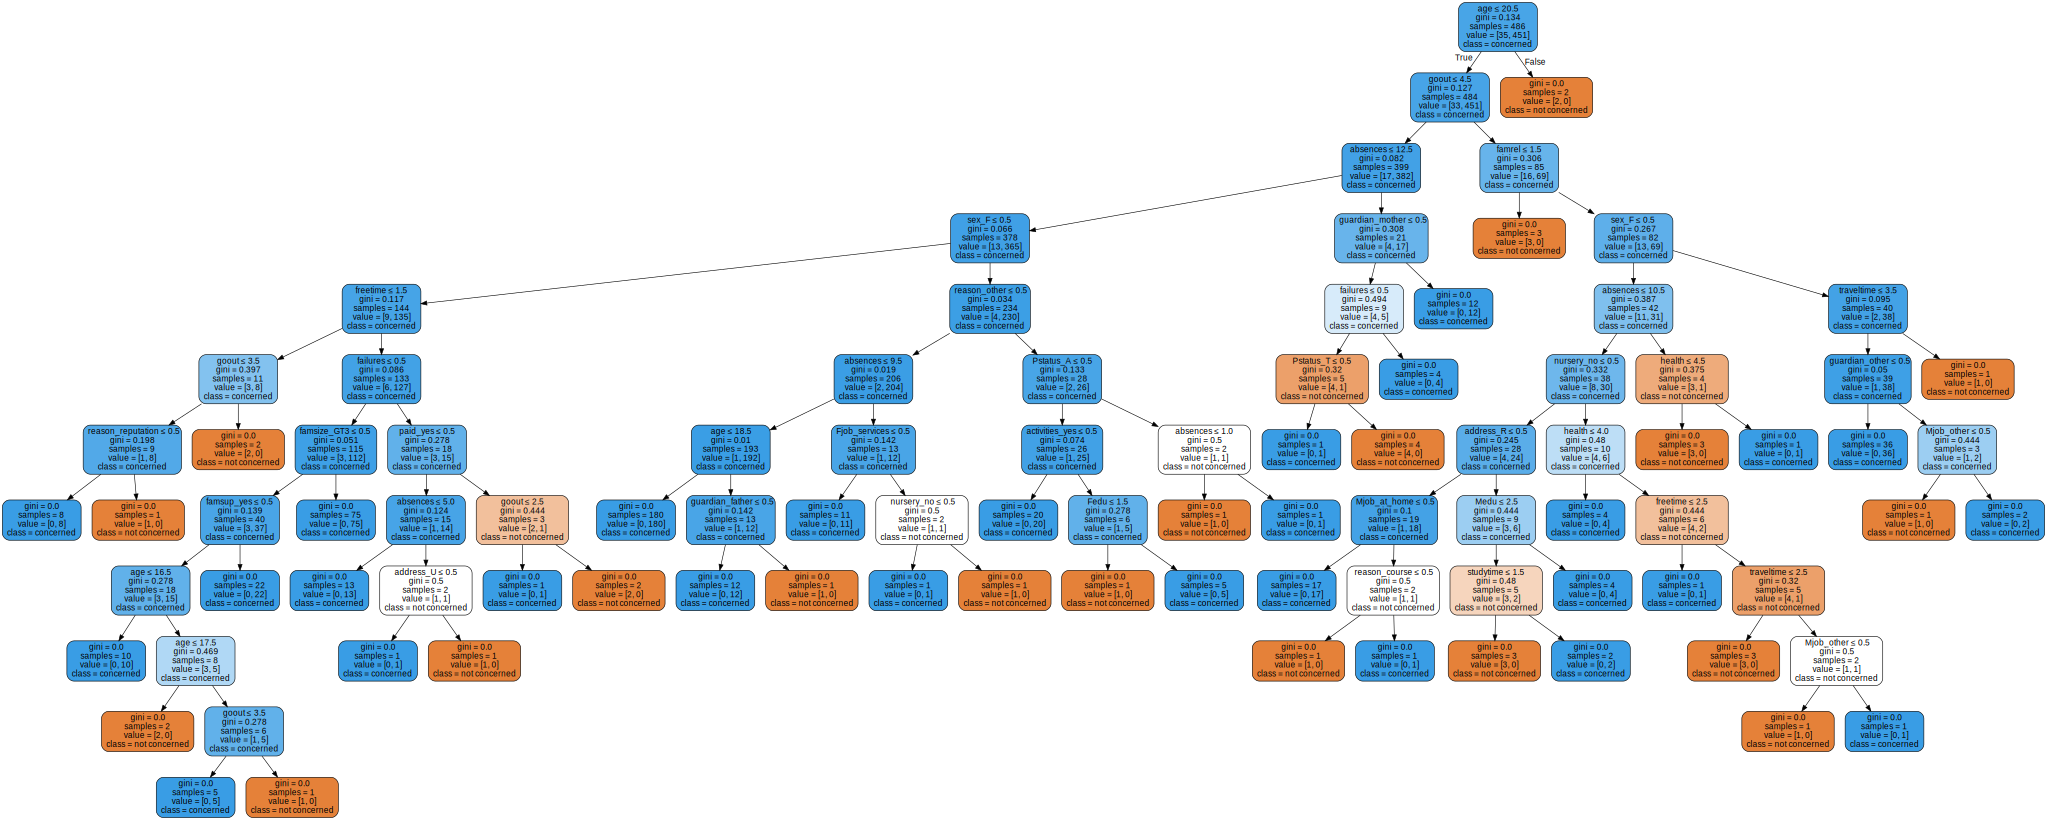

In [25]:
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=feature_names,  
    class_names=target_names,  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('concern_vs_not_concern.png')

graph = graphviz.Source(dot_data)  
graph 